# GRIP: THE SPARKS FOUNDATION

# Data Science and Business Analytics Intern

Author : Pallavi Patil

# Task 3 : Exploratory Data Analysis-Retail

perform 'Exploratory data Analysis' on dataset 'Sample Superstore'. Try to find out weak areas where you can work to make more profit.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
superstone=pd.read_csv('C:\\Users\\HP\\Downloads\\SampleSuperstore.csv')
superstone.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploring Data

In [5]:
superstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
superstone.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
superstone.shape

(9994, 13)

In [8]:
superstone.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
#Check null values
superstone.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#Check Unique values in Dataset
superstone.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Data shows the company Delivers product accross 49 states.

# Exploratory Data Analysis

Data visualization Analysis using pairplot of each column

1. Based on category

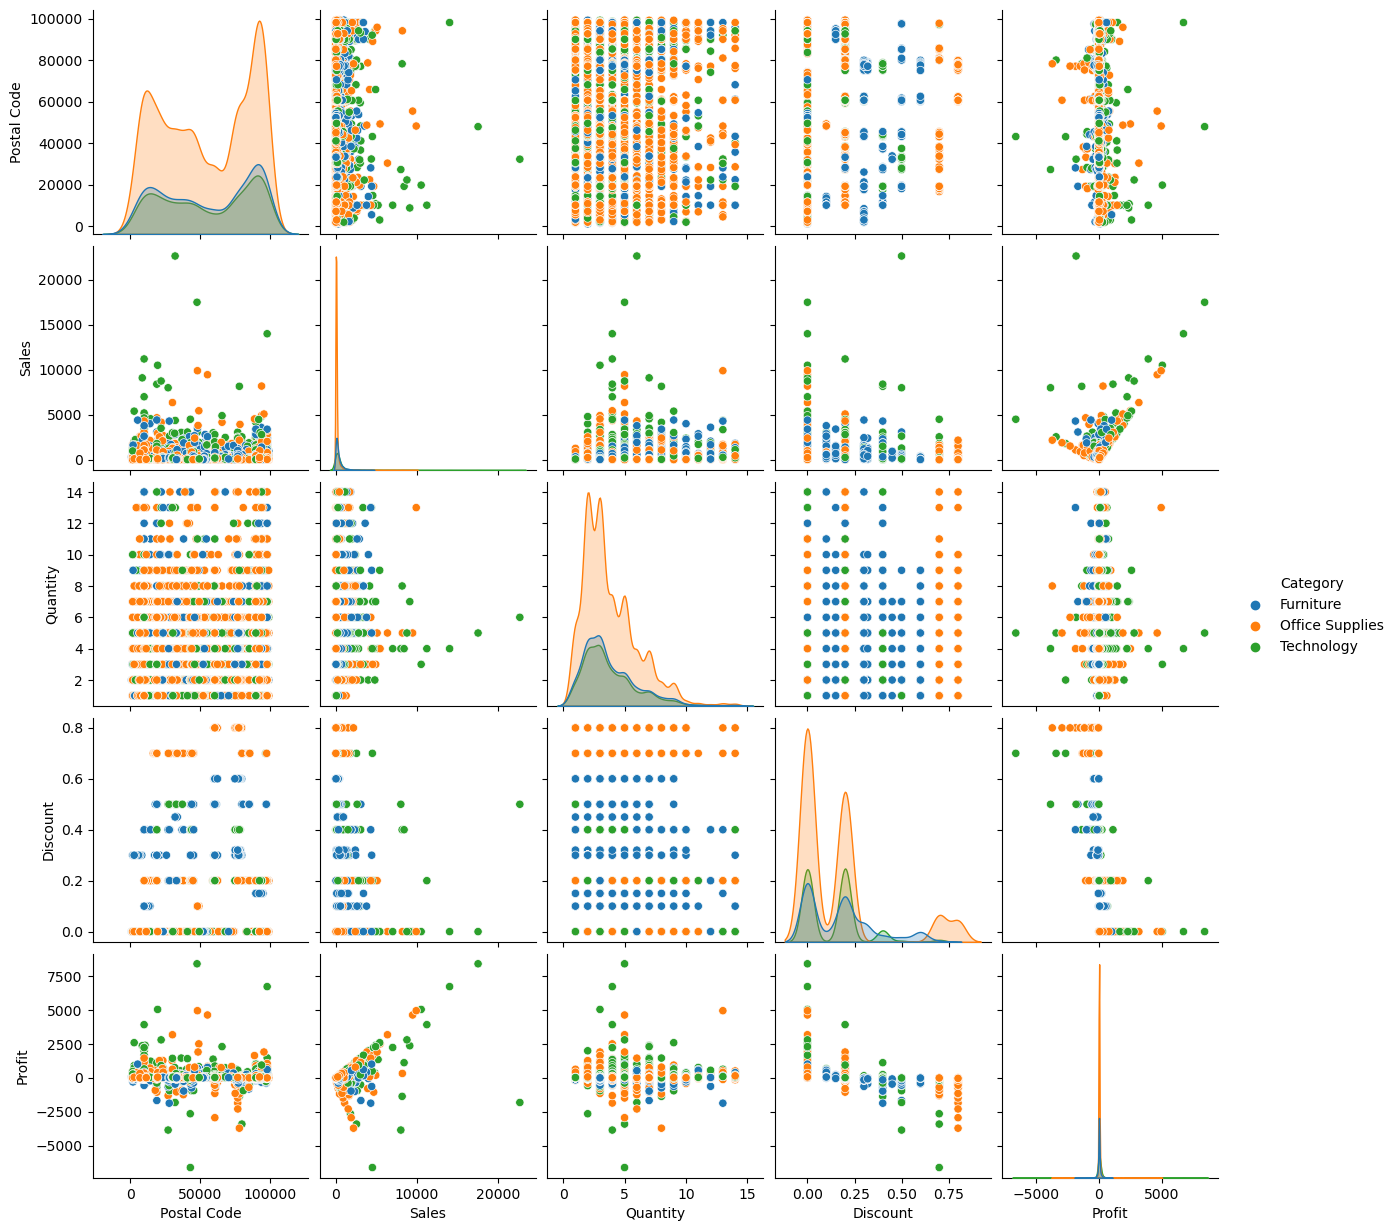

In [15]:
sns.pairplot(superstone,hue= "Category")

# 2. Based on Region

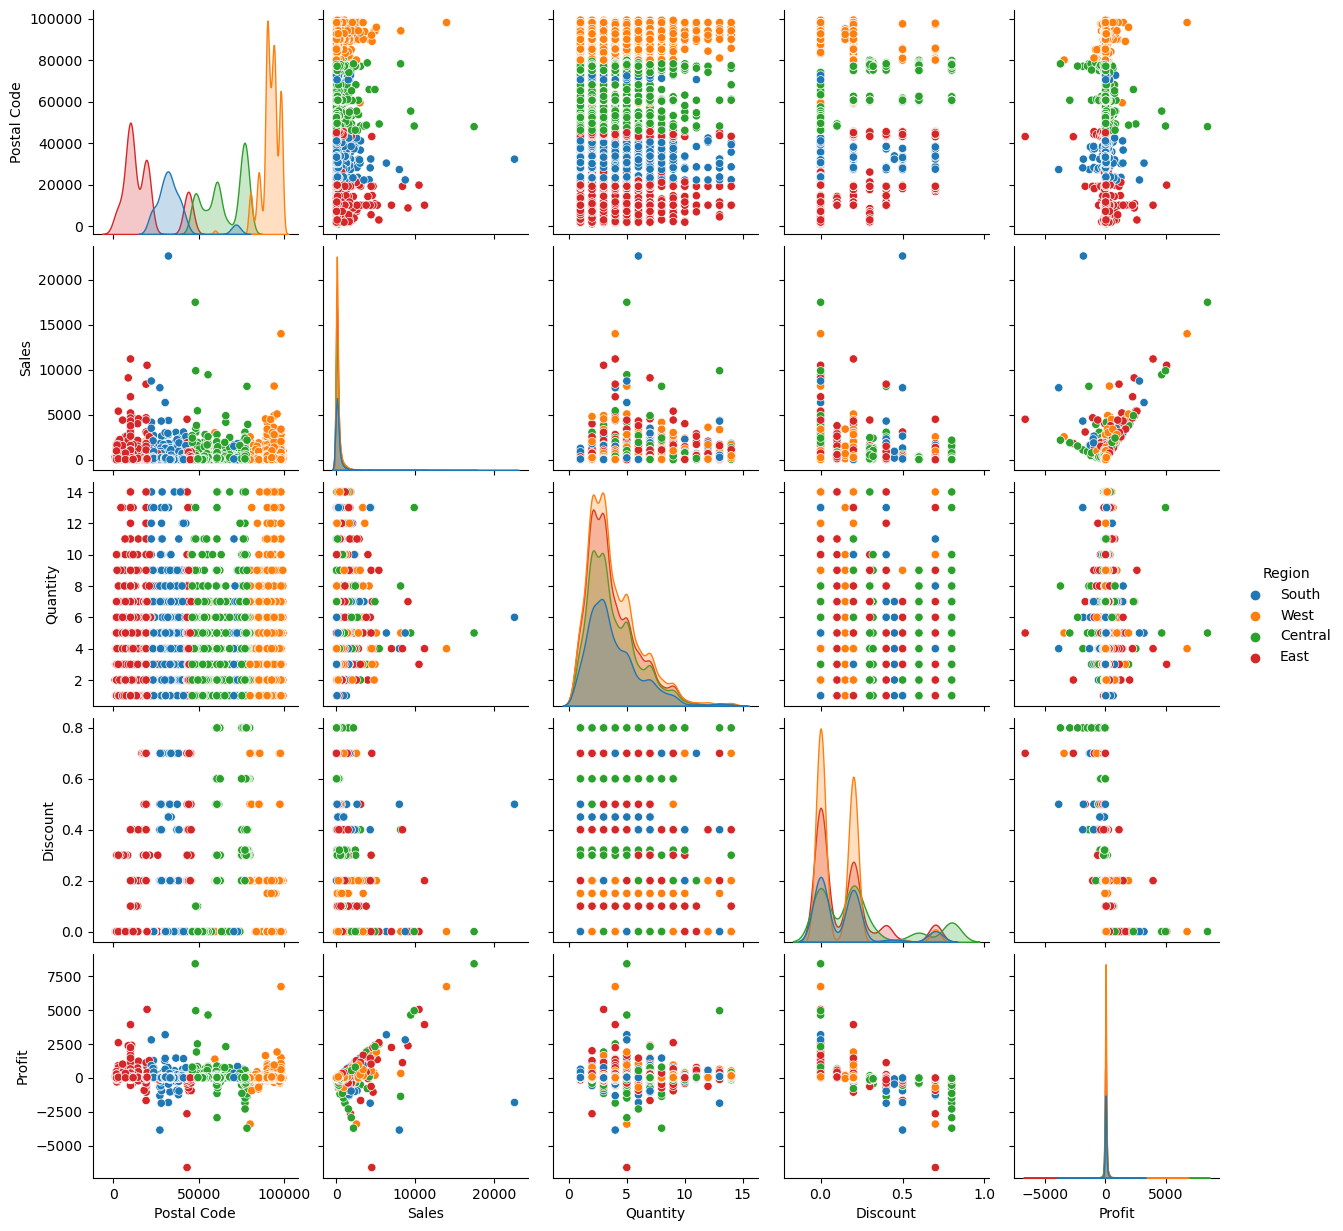

In [16]:
sns.pairplot(superstone,hue="Region")

In [17]:
# Check correlation
superstone.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


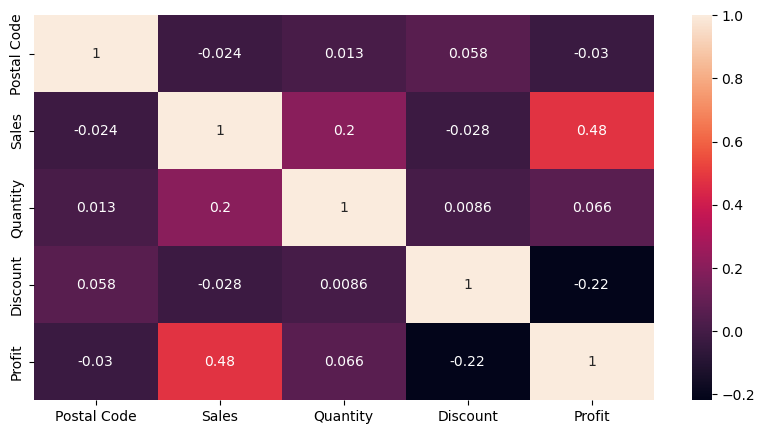

In [18]:
# Check correlation by heatmap
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.heatmap(superstone.corr(),annot=True)
plt.show()

In above heatmap brighest colour shows the strong correlation.
Dark colour Shows no correlation

Above Heatmap shows Sales and Profit are moderately correlated Discount and Profit are Negatively correlated Quantity and Profit are Moderately Correlated

It seems Profit is correlated with Sales

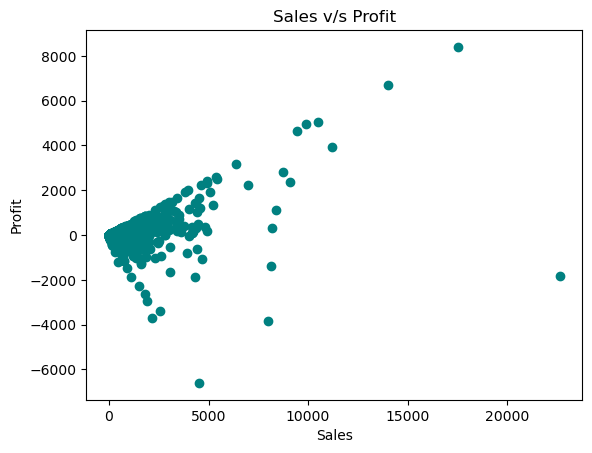

In [20]:
#Scatter plot 
plt.scatter(superstone['Sales'],superstone['Profit'],c='Teal')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

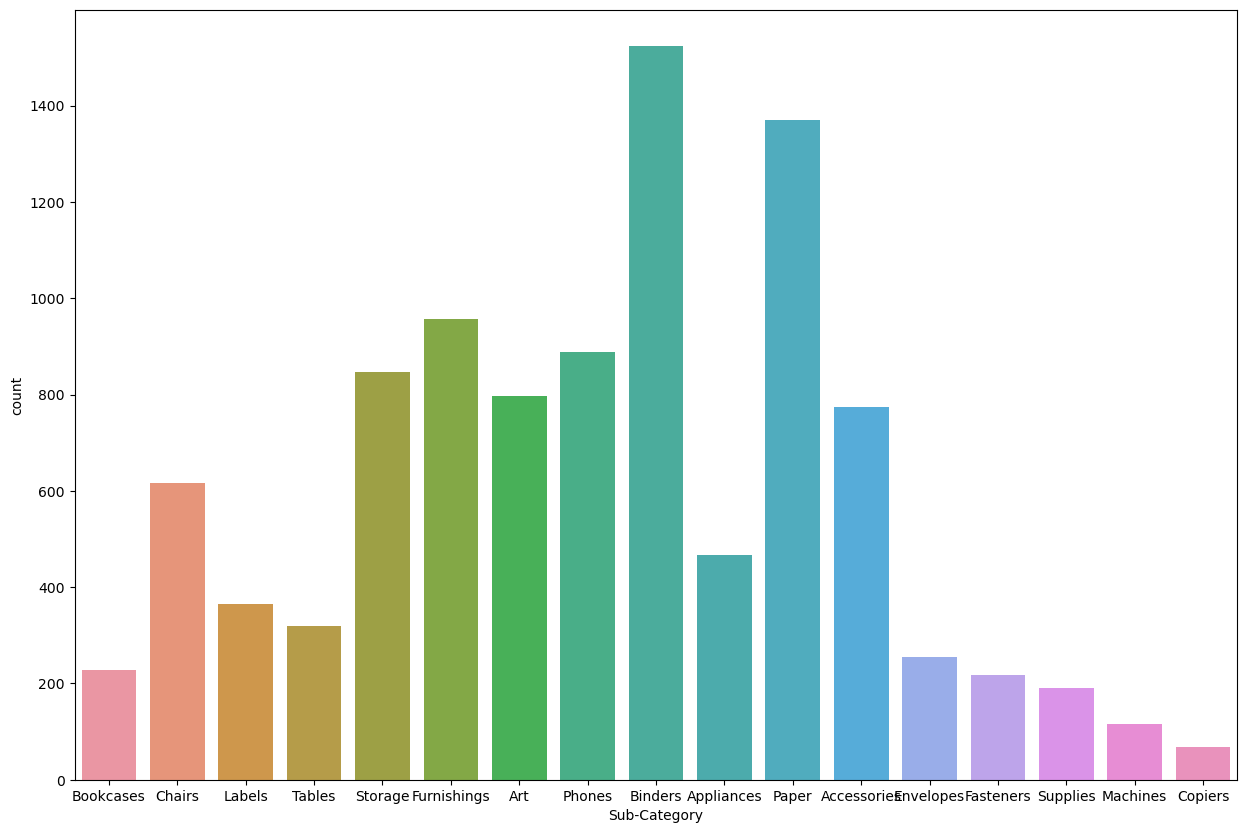

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(superstone['Sub-Category'])
plt.show()

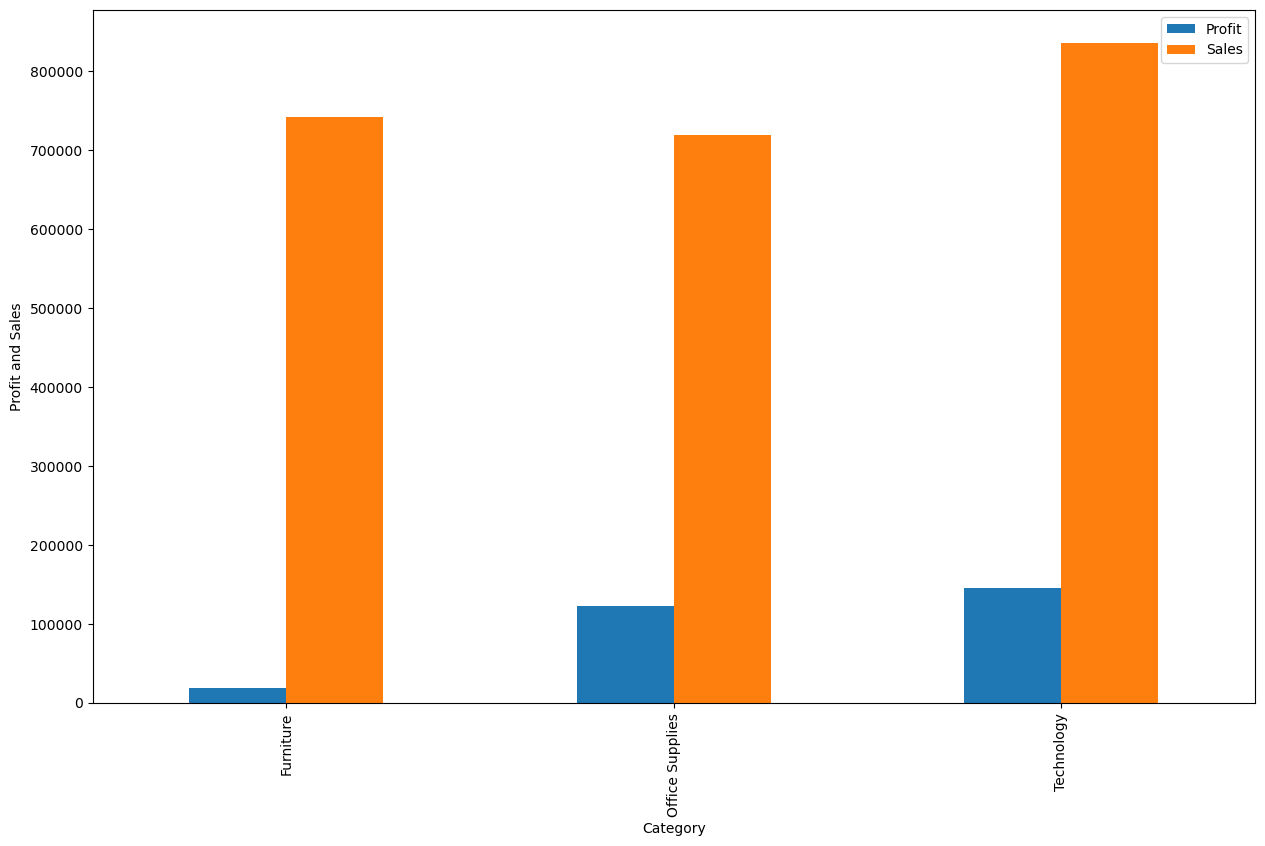

In [26]:
superstone.groupby(['Category'])[['Profit','Sales']].agg(sum).plot(kind='bar',figsize=(15,9))
plt.ylabel('Profit and Sales')
plt.show()

This shows that Furniture is generating very less profit.

Text(0.5, 1.0, 'Count of Segment by Category and Segment')

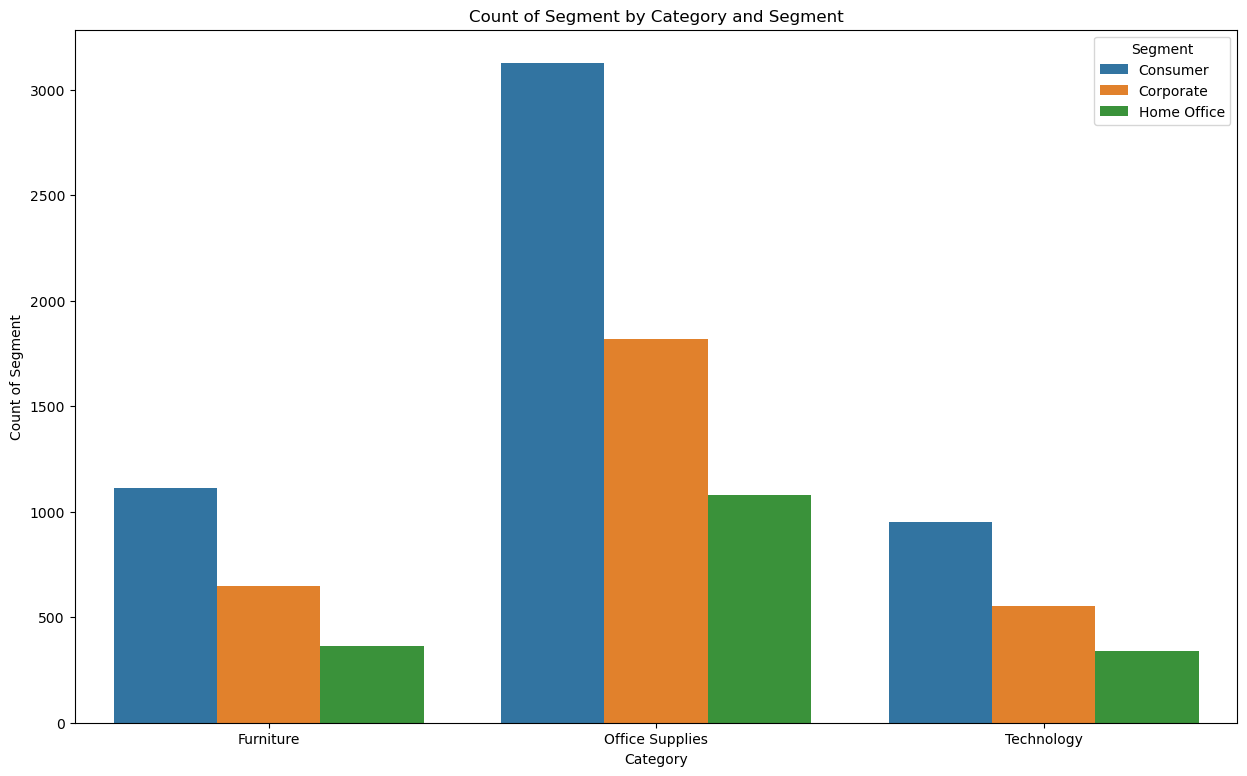

In [27]:
plt.figure(figsize=(15,9))
sns.countplot(x='Category',hue='Segment',data=superstone)
plt.ylabel('Count of Segment')
plt.title('Count of Segment by Category and Segment')

The highest purchases are in consumer segment whereas home office segment has the least purchases in each category.

We need to focus on the corporate and home office segment as well to increase our sales and profit.

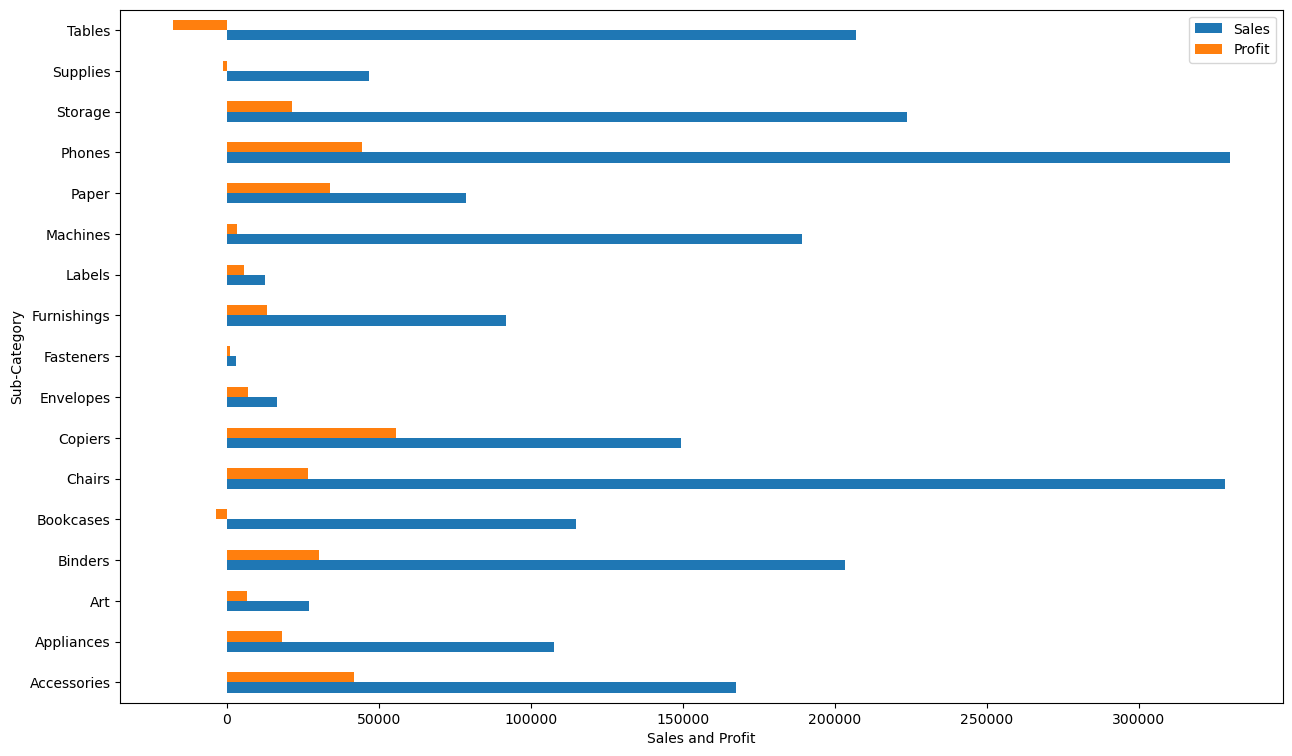

In [30]:
superstone.groupby('Sub-Category')[['Sales','Profit']].agg(sum).plot(kind='barh',figsize=(15,9))
plt.ylabel('Sub-Category')
plt.xlabel('Sales and Profit')
plt.show()

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

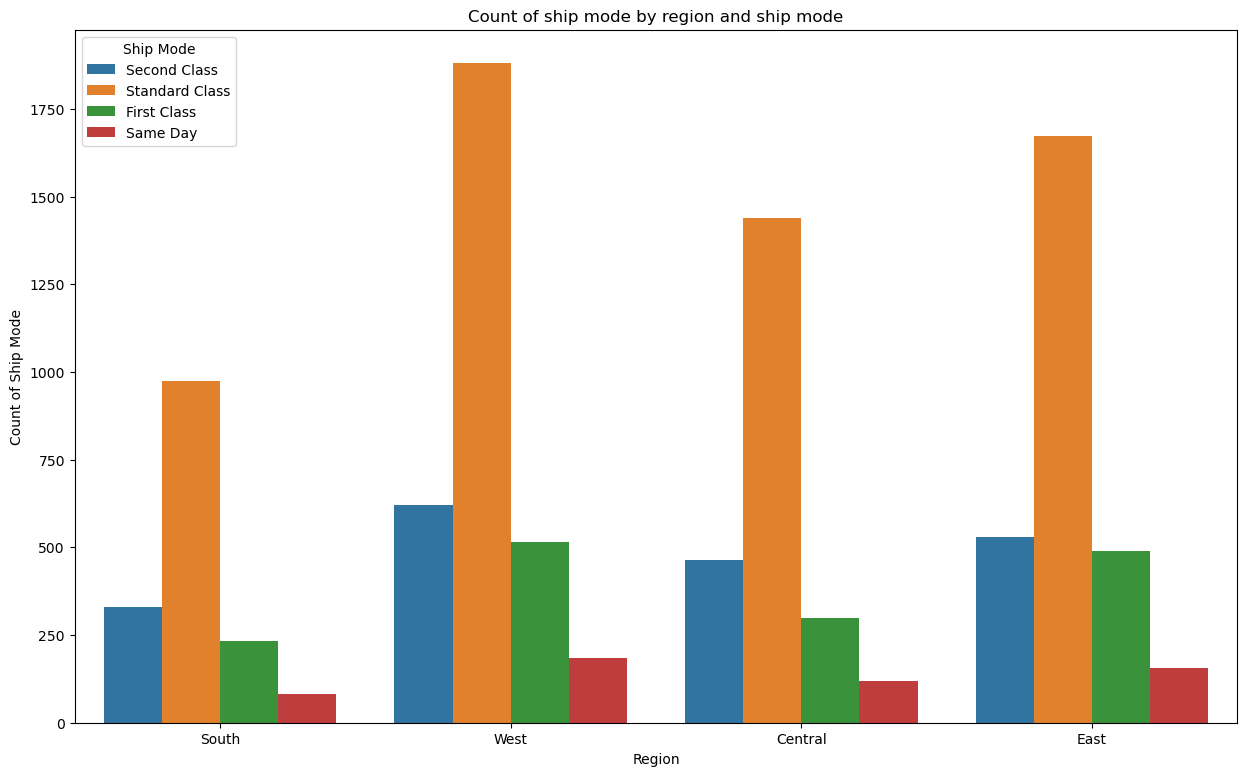

In [31]:
plt.figure(figsize=(15,9))
sns.countplot(x='Region',hue='Ship Mode',data=superstone)
plt.ylabel('Count of Ship Mode')
plt.title('Count of ship mode by region and ship mode')

Least sales are in Southern region,we can attract this region by offering more discount.

Standard mode of shipment is opted by most of the customers in each region.

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

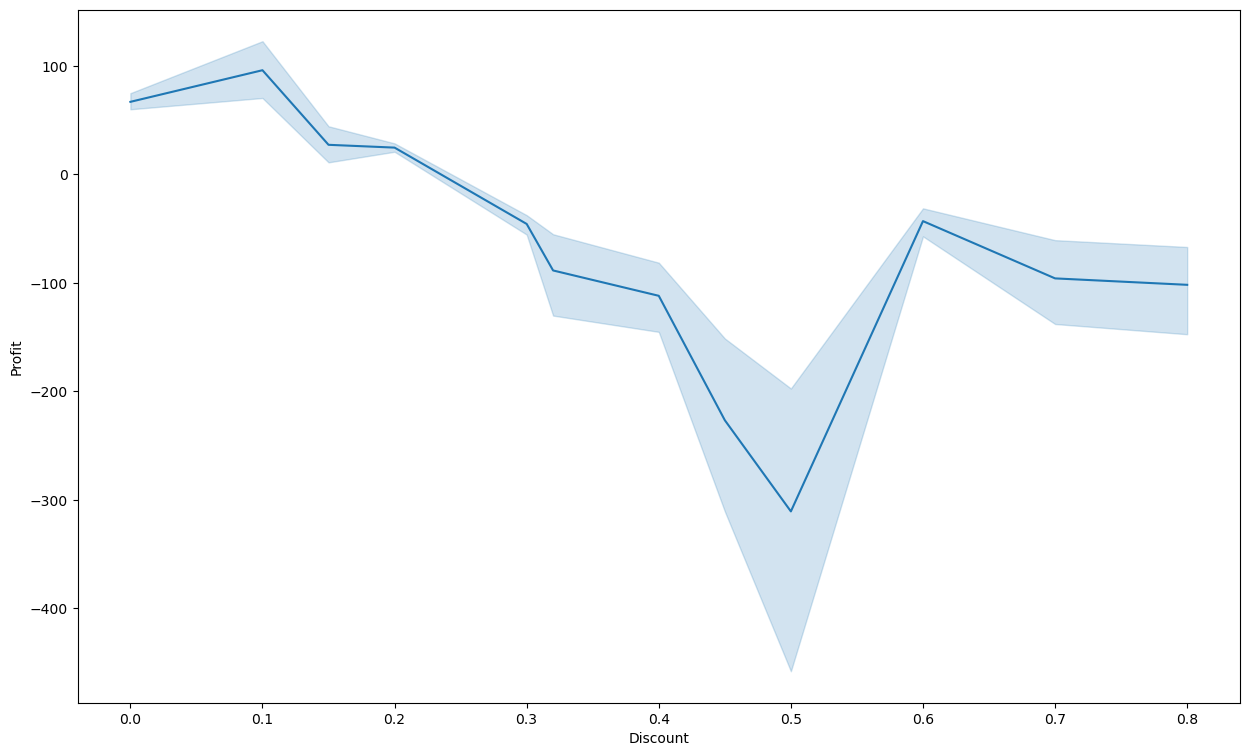

In [33]:
plt.figure(figsize=(15,9))
sns.lineplot(superstone['Discount'],superstone['Profit'],data=superstone)


To keep the profit margins the percentage of discount should be less than 25%

Thank you...!!!!!